# Introducction to Pandas

Pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language. 

We should import the following packages:

In [1]:
import pandas as pd
import numpy as np

Two important data types defined by pandas are:
- **Series**: a collection of observations on a single variable
- **DataFrame**: an object for storing related columns of data

Let's begin with **Series**

### Series

In [13]:
s = pd.Series(np.random.rand(5), name = 'Openness index')
s

0    0.491321
1    0.382497
2    0.441126
3    0.561743
4    0.293731
Name: Openness index, dtype: float64

We can imagine the indices 0,1,2,3,4 as indexing five different countries, and their values being their openness index

Pandas are built on top of NumPy arrays. Therefore, it supports similar operations

In [14]:
s*100

0    49.132138
1    38.249724
2    44.112563
3    56.174328
4    29.373071
Name: Openness index, dtype: float64

In [15]:
np.sqrt(s)

0    0.700943
1    0.618464
2    0.664173
3    0.749495
4    0.541969
Name: Openness index, dtype: float64

However, they have some aditional statistical methods:

In [16]:
s.describe()

count    5.000000
mean     0.434084
std      0.102449
min      0.293731
25%      0.382497
50%      0.441126
75%      0.491321
max      0.561743
Name: Openness index, dtype: float64

And their indices are more flexible

In [18]:
s.index = ['USA', 'DEU', 'FR', 'SP', 'ITA']
s

USA    0.491321
DEU    0.382497
FR     0.441126
SP     0.561743
ITA    0.293731
Name: Openness index, dtype: float64

We could use much of the same syntax as Python dictionaries

In [19]:
s['SP']

0.561743277837763

In [20]:
s['SP'] = 0.6
s

USA    0.491321
DEU    0.382497
FR     0.441126
SP     0.600000
ITA    0.293731
Name: Openness index, dtype: float64

In [21]:
'USA' in s

True

### DataFrames

While **Series** is a single column of data, a **DataFrames** is several columns, on for each variable

We are going to open the *Data.csv* file which could be found in my GitHub. This file contains data from some Latin American countries which has been obtained from the [World Development Indicators ](http://databank.worldbank.org/data/reports.aspx?source=world-development-indicators)database provided by the World Bank

In [70]:
df = pd.read_csv('https://github.com/jcasinos/Notes-econometrics/raw/master/Data.csv', sep =';')

In [71]:
df

,Country Name,Year,"Foreign direct investment, net inflows (% of GDP)",GDP per capita (constant 2010 US$),"Government expenditure on education, total (% of GDP)"
0,Argentina,2013,1.779206,10699.197720,5.41769
1,Brazil,2013,2.818097,11912.146760,5.99395
2,Chile,2013,7.576676,14551.044420,4.55840
3,Colombia,2013,4.263451,7051.040137,4.90668
4,Mexico,2013,3.735144,9409.965371,4.74773


We can select particular rows using standard Python slicing:

In [72]:
df[0:2]

,Country Name,Year,"Foreign direct investment, net inflows (% of GDP)",GDP per capita (constant 2010 US$),"Government expenditure on education, total (% of GDP)"
0,Argentina,2013,1.779206,10699.19772,5.41769
1,Brazil,2013,2.818097,11912.14676,5.99395


We can select columns using a list containing the names of the desired colums:

In [73]:
df[['Country Name', 'Foreign direct investment, net inflows (% of GDP)']]

,Country Name,"Foreign direct investment, net inflows (% of GDP)"
0,Argentina,1.779206
1,Brazil,2.818097
2,Chile,7.576676
3,Colombia,4.263451
4,Mexico,3.735144


To select both rows and columns we should use *.iloc[rows,columns]*

In [74]:
df.iloc[0:2,0:3]

,Country Name,Year,"Foreign direct investment, net inflows (% of GDP)"
0,Argentina,2013,1.779206
1,Brazil,2013,2.818097


Here the index 0,1,...,4 is redundant since we could use the country name

In [75]:
df = df.set_index('Country Name')
df

,Year,"Foreign direct investment, net inflows (% of GDP)",GDP per capita (constant 2010 US$),"Government expenditure on education, total (% of GDP)"
Country Name,,,,
Argentina,2013,1.779206,10699.197720,5.41769
Brazil,2013,2.818097,11912.146760,5.99395
Chile,2013,7.576676,14551.044420,4.55840
Colombia,2013,4.263451,7051.040137,4.90668
Mexico,2013,3.735144,9409.965371,4.74773


We can give to the columns better names:

In [76]:
df.rename(columns={'Foreign direct investment, net inflows (% of GDP)': 'HDi'}, inplace = True)
df.rename(columns={'GDP per capita (constant 2010 US$)': 'GDP pc'}, inplace = True)
df.rename(columns={'Government expenditure on education, total (% of GDP)': 'Edu'}, inplace = True)
df

,Year,HDi,GDP pc,Edu
Country Name,,,,
Argentina,2013,1.779206,10699.197720,5.41769
Brazil,2013,2.818097,11912.146760,5.99395
Chile,2013,7.576676,14551.044420,4.55840
Colombia,2013,4.263451,7051.040137,4.90668
Mexico,2013,3.735144,9409.965371,4.74773


As usual we could present the GDP per capita in  logarithms

In [77]:
df['GDP pc'] = np.log(df['GDP pc'])
df

,Year,HDi,GDP pc,Edu
Country Name,,,,
Argentina,2013,1.779206,9.277924,5.41769
Brazil,2013,2.818097,9.385314,5.99395
Chile,2013,7.576676,9.585418,4.55840
Colombia,2013,4.263451,8.860930,4.90668
Mexico,2013,3.735144,9.149525,4.74773


One cool thing about pandas **DataFrames** and **Series** objects is that they have methods for plotting and visualization that work with **Matplotlib**

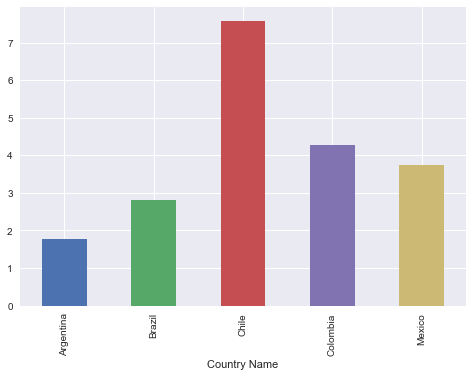

In [80]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
df['HDi'].plot(kind = 'bar')
plt.show()

We could sort the variables by their foreign direct investment net inflows

In [82]:
df = df.sort_values(by = 'HDi', ascending = False)
df

,Year,HDi,GDP pc,Edu
Country Name,,,,
Chile,2013,7.576676,9.585418,4.55840
Colombia,2013,4.263451,8.860930,4.90668
Mexico,2013,3.735144,9.149525,4.74773
Brazil,2013,2.818097,9.385314,5.99395
Argentina,2013,1.779206,9.277924,5.41769


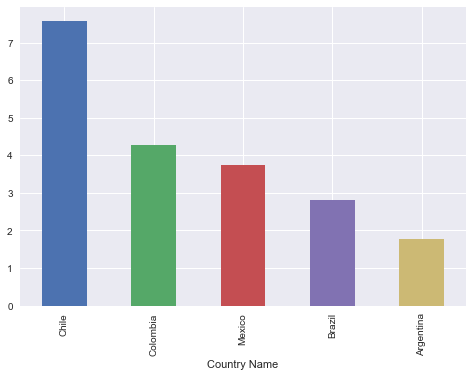

In [83]:
df['HDi'].plot(kind = 'bar')
plt.show()